# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Configure display for quick inspection
pd.set_option("display.max_columns", None)
sns.set_theme(context="notebook", style="whitegrid")
RANDOM_STATE = 42

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
DATA_PATH = Path("../data_clustering_raw/data_clustering.csv").resolve()
assert DATA_PATH.exists(), f"Dataset not found at {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
display(df.head())
display(df.dtypes)

Rows: 2,397, Columns: 12


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionSize,Target
0,-0.970546,1.0,36.0,0.0,1.419862,0.0,-0.548393,-0.204629,-0.000315,0,2,2
1,0.268963,1.0,15.0,0.0,1.307715,0.0,0.307960,-0.204629,2.218381,0,0,3
2,-0.586526,1.0,23.0,2.0,-1.439874,3.0,-0.905207,-0.204629,-1.024091,1,2,1
3,-0.387294,1.0,33.0,2.0,-1.047361,3.0,-1.347656,-0.204629,0.886694,1,2,2
4,-0.703375,1.0,28.0,0.0,-1.495947,3.0,0.750409,-0.204629,-1.111505,1,2,1


TransactionAmount      float64
TransactionType        float64
Location               float64
Channel                float64
CustomerAge            float64
CustomerOccupation     float64
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
AgeGroup                 int64
TransactionSize          int64
Target                   int64
dtype: object

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Missing values per column:
 TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
AgeGroup               0
TransactionSize        0
Target                 0
dtype: int64
Duplicate rows: 0

Target distribution:


Target
0    587
1    616
2    578
3    616
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2397.0,-0.045457,8.564350e-01,-1.017881,-0.738080,-0.289851,0.389543,2.080977
TransactionType,2397.0,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
Location,2397.0,21.375887,1.241439e+01,0.000000,11.000000,21.000000,32.000000,43.000000
Channel,2397.0,1.013350,8.312482e-01,0.000000,0.000000,1.000000,2.000000,3.000000
CustomerAge,2397.0,-0.002976,1.000141e+00,-1.495947,-0.991288,0.018031,0.803056,1.980594
CustomerOccupation,2397.0,1.531498,1.153653e+00,0.000000,0.000000,2.000000,3.000000,4.000000
TransactionDuration,2397.0,0.001043,1.003315e+00,-1.561745,-0.805299,-0.105944,0.607683,2.577295
LoginAttempts,2397.0,-0.204629,9.883047e-15,-0.204629,-0.204629,-0.204629,-0.204629,-0.204629
AccountBalance,2397.0,-0.005633,1.001030e+00,-1.286100,-0.929667,-0.107728,0.653306,2.531190
AgeGroup,2397.0,0.496037,5.000886e-01,0.000000,0.000000,0.000000,1.000000,1.000000


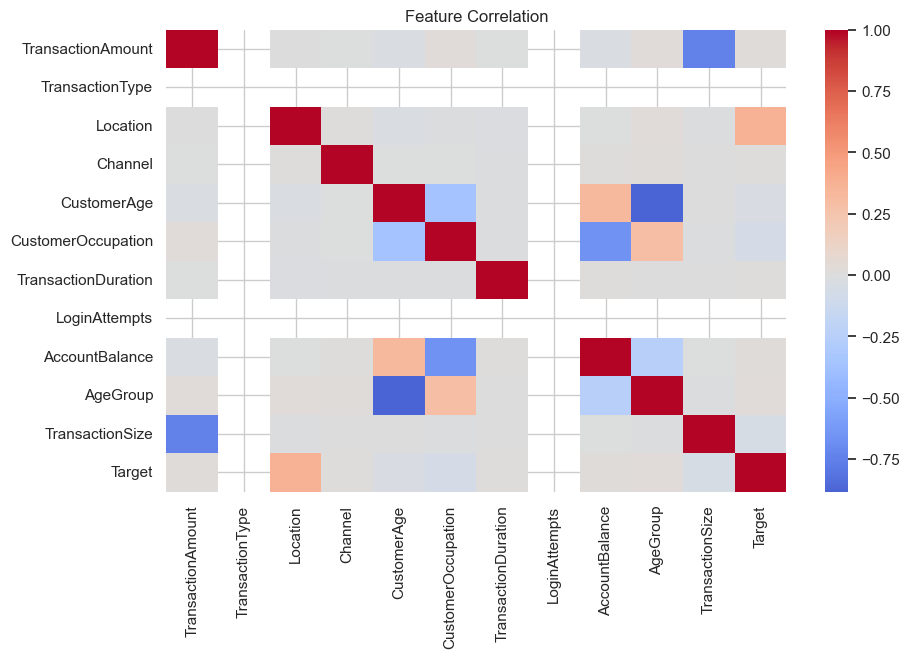

In [3]:
# Basic health checks
missing_counts = df.isna().sum()
duplicate_rows = df.duplicated().sum()
print("Missing values per column:\n", missing_counts)
print(f"Duplicate rows: {duplicate_rows}")

# Target distribution
if "Target" in df.columns:
    print("\nTarget distribution:")
    display(df['Target'].value_counts().sort_index())

# Descriptive statistics
display(df.describe().T)

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
target_col = "Target"
assert target_col in df.columns, "Target column is missing"

X = df.drop(columns=[target_col])
y = df[target_col]

numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

preprocess = ColumnTransformer([
    ("num", numeric_transformer, numeric_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

preprocess.fit(X_train)
X_train_processed = preprocess.transform(X_train)
X_test_processed = preprocess.transform(X_test)

print(f"Train shape (rows, features): {X_train_processed.shape}")
print(f"Test shape  (rows, features): {X_test_processed.shape}")

# Re-wrap to DataFrame for downstream modeling
feature_names = preprocess.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)
display(X_train_df.head())

# Persist artifacts for reuse
out_dir = Path("data_clustering_preprocessing")
out_dir.mkdir(exist_ok=True)
joblib.dump(preprocess, out_dir / "preprocess_pipeline.joblib")
X_train_df.assign(Target=y_train).to_csv(out_dir / "train_processed.csv", index=False)
X_test_df.assign(Target=y_test).to_csv(out_dir / "test_processed.csv", index=False)
print("Saved preprocess_pipeline.joblib, train_processed.csv, and test_processed.csv to data_clustering_preprocessing/")

Train shape (rows, features): (1917, 11)
Test shape  (rows, features): (480, 11)


,num__TransactionAmount,num__TransactionType,num__Location,num__Channel,num__CustomerAge,num__CustomerOccupation,num__TransactionDuration,num__LoginAttempts,num__AccountBalance,num__AgeGroup,num__TransactionSize
2016,-1.073058,0.0,0.935863,0.001261,-1.094808,1.262849,-0.969537,0.0,-0.788747,0.999478,0.775323
681,0.841248,0.0,0.534276,1.210033,-0.645890,-1.322642,-1.251214,0.0,0.209360,0.999478,-1.357093
1482,-1.011262,0.0,-0.268898,1.210033,-1.094808,1.262849,2.283831,0.0,-1.073793,0.999478,0.775323
2024,0.186011,0.0,0.694911,-1.207511,1.318125,-1.322642,-1.208962,0.0,1.435287,-1.000522,-1.357093
156,-0.895763,0.0,1.498084,0.001261,0.644749,0.401019,-0.955453,0.0,-1.029457,-1.000522,0.775323


Saved preprocess_pipeline.joblib, train_processed.csv, and test_processed.csv to data_clustering_preprocessing/
